In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\Python-Projects-master\Machine learning\loan.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_4480\71723079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


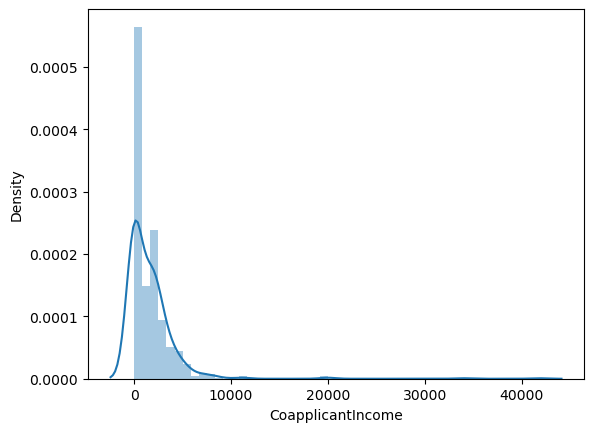

In [6]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

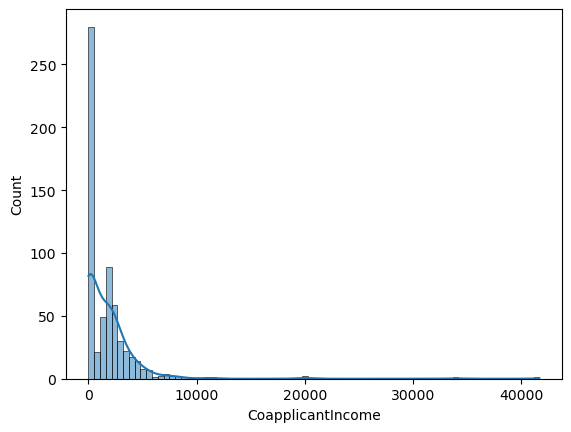

In [10]:
sns.histplot(df["CoapplicantIncome"], kde=True)  # `kde=True` replicates the KDE line from distplot
plt.show()



In [12]:
q1 = df["CoapplicantIncome"].quantile(0.25);
q3 = df["CoapplicantIncome"].quantile(0.75);
iqr = q3 - q1

In [13]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)

In [14]:
df = df[df["CoapplicantIncome"] <= max_r]

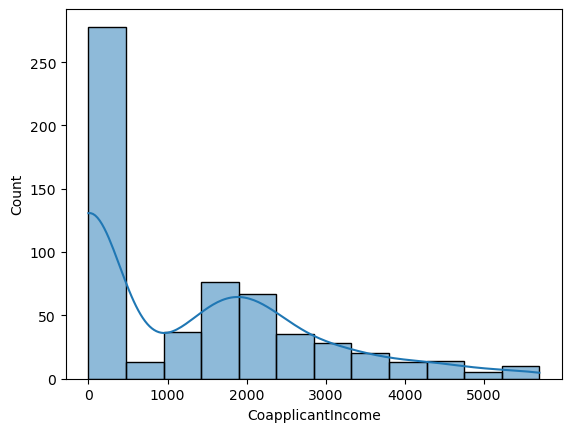

In [16]:
sns.histplot(df["CoapplicantIncome"], kde=True)  # `kde=True` replicates the KDE line from distplot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4480\71723079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


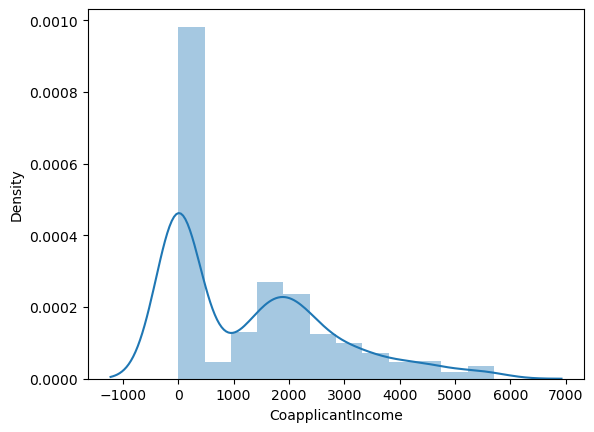

In [17]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

In [18]:
from sklearn.preprocessing import FunctionTransformer

In [20]:
ft = FunctionTransformer(func = np.log1p)

In [21]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [22]:
df["CoapplicantIncome_ft"] = ft.transform(df[["CoapplicantIncome"]])

C:\Users\user\AppData\Local\Temp\ipykernel_4480\3025960126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])
C:\Users\user\AppData\Local\Temp\ipykernel_4480\3025960126.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome_ft"])


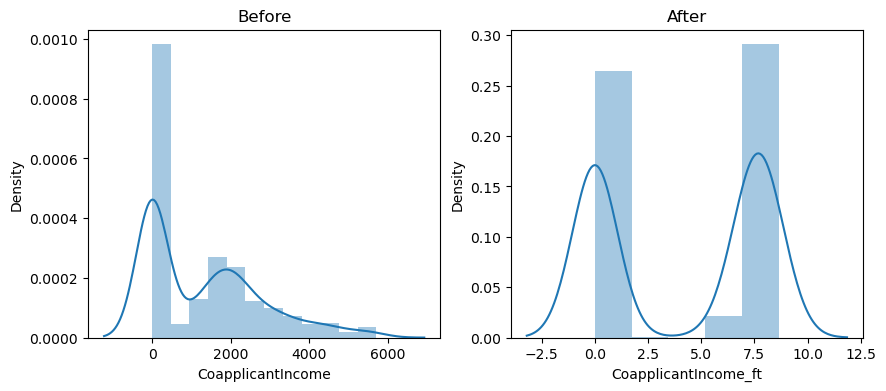

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(df["CoapplicantIncome_ft"])
plt.title("After")
plt.show()